In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.

recent_date = session.query(measurement.date).order_by(measurement.date.desc()).all()[0]
recent_date

('2017-08-23',)

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

from datetime import datetime, timedelta
date_recent_date = datetime.strptime(recent_date[0], "%Y-%m-%d")
one_year_ago = date_recent_date - timedelta(days = 365)

#convert one year ago to string
one_year_ago_string = one_year_ago.strftime('%F')
one_year_ago_string

'2016-08-23'

<Axes: title={'center': 'precipitation'}, xlabel='date', ylabel='inches'>

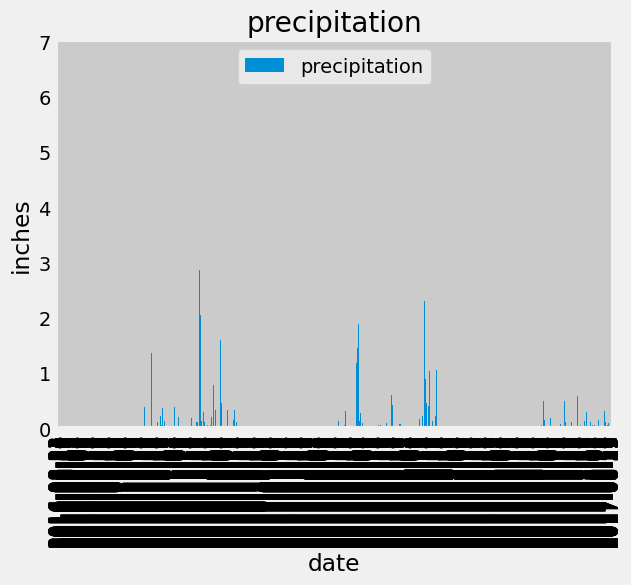

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. Continued

# Perform a query to retrieve the data and precipitation scores
year_date_prec = session.query(measurement.date, measurement.prcp).filter(measurement.date.between('2016-08-23', '2017-08-23'))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df = pd.DataFrame(year_date_prec, 
                      columns = ['date', 'precipitation'])

# Sort the dataframe by date
year_df_sorted = year_df.sort_values(by = ['date'])

year_df_sorted.plot.bar(x = 'date', y = 'precipitation', title = "precipitation", ylabel = "inches")

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data

year_df_sorted['precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [47]:
session.query(measurement.station).\
    group_by(measurement.station).count()

9

In [66]:
# number of observations by station
session.query(measurement.station, 
             func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature. (Note: 
# The idea for this came from "ask the class" in slack)
sel = [
       func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]

most_active_station = session.query(*sel).\
    filter(measurement.station == 'USC00519281').all()

most_active_station

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'temp'}>]], dtype=object)

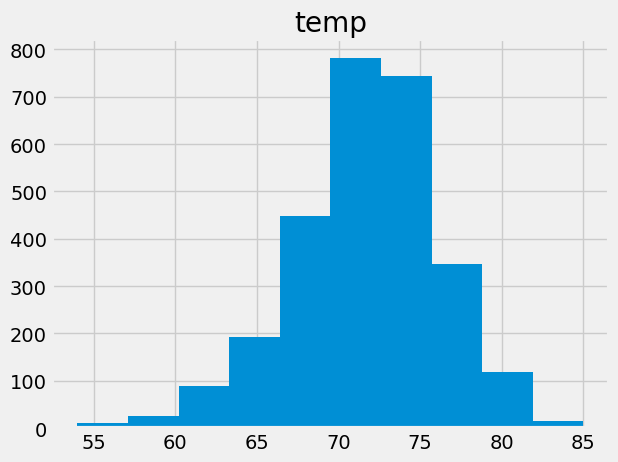

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.tobs) .\
    filter(measurement.station == 'USC00519281').all()

temp_df = pd.DataFrame(temp, 
                      columns = ['temp'])

temp_df.hist(column = 'temp')

# Close Session

In [75]:
# Close Session
session.close()